In [2]:
import pandas as pd
file = pd.read_csv("../Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")
file.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


# Data cleaning
we need to change:

medium high lows ---> 1 2 0

yes no           ---> 1 0

profession --> one hot encoding     

sleep, age, bmi --> normalize

weight, height ---> drop it we already have bmi

and remove nan values

make train test split

  - random shuffle
  - split

In [3]:
file.info() #we got lucky no null here
file.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [4]:
file["exercise"].unique()

array(['low', 'high', 'medium', 'none'], dtype=object)

In [5]:
file.replace({'yes': 0, 'no': 1}, inplace=True)
file.replace({'low': 0, 'medium': 0.5, 'high': 1}, inplace=True)
file.replace({'high': 1, 'low': 0,'none':-1}, inplace=True)

/tmp/ipython-input-1328979411.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file.replace({'yes': 0, 'no': 1}, inplace=True)
/tmp/ipython-input-1328979411.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file.replace({'low': 0, 'medium': 0.5, 'high': 1}, inplace=True)
/tmp/ipython-input-1328979411.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `

In [6]:
file.drop("weight",inplace=True,axis=1)
file.drop("height",inplace=True,axis =1)

In [7]:
file.head()

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,0.0,6.1,0.5,0,0,0,office_worker,17.6,1
1,69,1.0,6.9,1.0,1,1,1,teacher,26.3,1
2,46,1.0,6.6,0.0,0,1,1,artist,45.3,1
3,32,0.5,8.5,0.5,1,1,1,artist,15.6,0
4,60,1.0,8.0,0.0,1,1,0,teacher,25.8,1


In [8]:
def normalize(column,df):
  x_max, x_min = max(df[column]), min(df[column])
  df[column] = (df[column] - x_min) / (x_max - x_min)

In [9]:
normalize("sleep",file)
normalize("bmi",file)
normalize("age",file)

In [10]:
file.head()

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,0.622951,0.0,0.442857,0.5,0,0,0,office_worker,0.1550,1
1,0.836066,1.0,0.557143,1.0,1,1,1,teacher,0.3725,1
2,0.459016,1.0,0.514286,0.0,0,1,1,artist,0.8475,1
3,0.229508,0.5,0.785714,0.5,1,1,1,artist,0.1050,0
4,0.688525,1.0,0.714286,0.0,1,1,0,teacher,0.3600,1


In [11]:
def train_test_split(seed,fraction,df):
  df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
  split = int(fraction * len(df))
  train_df = df[:split]
  test_df = df[split:].reset_index(drop=True)
  return [train_df,test_df]

In [12]:
train_df, test_df = train_test_split(69,0.85,file)

In [13]:
X_train, y_train = train_df.drop("health_risk",axis=1),train_df["health_risk"]
X_test, y_test = test_df.drop("health_risk",axis=1),test_df["health_risk"]
X_test

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
0,0.672131,0.5,0.671429,0.0,1,0,0,doctor,0.3725
1,0.000000,-1.0,0.628571,1.0,1,0,1,engineer,0.3625
2,0.344262,-1.0,0.628571,0.0,0,1,1,office_worker,0.2650
3,0.803279,0.0,0.385714,0.5,0,1,1,teacher,0.4100
4,0.836066,0.5,0.614286,0.5,1,1,0,driver,0.7000
...,...,...,...,...,...,...,...,...,...
745,0.491803,0.5,0.357143,0.5,1,1,0,doctor,0.1925
746,0.819672,1.0,0.257143,0.0,1,0,0,engineer,0.3325
747,0.311475,0.5,1.000000,1.0,1,1,1,engineer,0.6775
748,0.901639,0.0,0.985714,0.5,1,1,0,teacher,0.0925


In [14]:
file["profession"].unique()

array(['office_worker', 'teacher', 'artist', 'farmer', 'driver',
       'engineer', 'student', 'doctor'], dtype=object)

In [15]:
def one_hot_encode(column,df):
  categories = df[column].unique()
  for category in categories:
    df[category] = (df[column] == category).astype(int)
  df.drop(column,axis=1,inplace=True)

one_hot_encode("profession",X_train)
one_hot_encode("profession",X_test)

In [16]:
X_train

,age,exercise,sleep,sugar_intake,smoking,alcohol,married,bmi,engineer,doctor,artist,farmer,teacher,driver,student,office_worker
0,0.114754,0.5,0.485714,1.0,1,1,1,0.5950,1,0,0,0,0,0,0,0
1,0.016393,1.0,0.842857,0.5,0,1,0,0.4400,0,1,0,0,0,0,0,0
2,0.327869,-1.0,0.714286,0.5,0,0,0,0.4950,0,0,1,0,0,0,0,0
3,0.655738,0.5,0.042857,0.0,1,1,0,0.2475,0,0,0,1,0,0,0,0
4,0.524590,0.5,0.942857,0.0,0,1,0,0.4375,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.967213,0.0,0.542857,0.5,1,1,0,0.9750,0,0,0,1,0,0,0,0
4246,0.459016,1.0,0.642857,0.0,1,0,1,0.4250,0,0,0,0,0,0,0,1
4247,0.622951,0.5,0.328571,0.0,1,1,1,0.6450,0,0,0,0,0,0,1,0
4248,0.885246,0.5,0.571429,0.0,1,1,0,0.6850,0,0,0,0,0,0,1,0


In [17]:
import numpy as np

X_train, X_test = X_train.to_numpy(), X_test.to_numpy()

#for explicit shaping to avoid weird numpy stuff
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

#this is the c in y = mx + c
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [18]:
weights = np.random.randn(X_train.shape[1], 1)

In [19]:
def train(epoch,learning_rate,X,y,weights):
  m = y.shape[0]
  rmse_list = []
  for i in range(epoch):
    y_hat = np.dot(X,weights)
    dJ = (2/m)*(X.T).dot(y_hat-y)
    weights = weights - learning_rate*dJ
    RMSE = np.sqrt(np.mean((y_hat-y)**2))
    rmse_list.append(RMSE)
    if i%1000 == 0:
      RMSE = np.sqrt(np.mean((y_hat-y)**2))
      print(f"Epoch {i}: RMSE : {RMSE}")
  return weights, rmse_list

weights, rmse_list = train(100000,0.0008,X_train,y_train,weights)

Epoch 0: RMSE : 1.7904079197687781
Epoch 1000: RMSE : 1.3986331574182922
Epoch 2000: RMSE : 1.1449877724515405
Epoch 3000: RMSE : 0.9521479850920582
Epoch 4000: RMSE : 0.803464913070381
Epoch 5000: RMSE : 0.6886461083486309
Epoch 6000: RMSE : 0.6005117816966238
Epoch 7000: RMSE : 0.5335729076130119
Epoch 8000: RMSE : 0.4833832965034095
Epoch 9000: RMSE : 0.4462462007005766
Epoch 10000: RMSE : 0.4190899020917983
Epoch 11000: RMSE : 0.3994113850223396
Epoch 12000: RMSE : 0.3852300447960806
Epoch 13000: RMSE : 0.37502713632521834
Epoch 14000: RMSE : 0.36767074551367496
Epoch 15000: RMSE : 0.36233652833480956
Epoch 16000: RMSE : 0.35843438034449
Epoch 17000: RMSE : 0.35554681844445646
Epoch 18000: RMSE : 0.35338058571854714
Epoch 19000: RMSE : 0.35173037526431206
Epoch 20000: RMSE : 0.35045249073646795
Epoch 21000: RMSE : 0.3494461265146882
Epoch 22000: RMSE : 0.3486402484052876
Epoch 23000: RMSE : 0.3479844797656217
Epoch 24000: RMSE : 0.34744280198064964
Epoch 25000: RMSE : 0.34698921019

In [20]:
def test(X,y_true,weights):
  y_predicted = np.dot(X,weights)
  return y_predicted

In [21]:
y_predicted = test(X_test,y_test,weights)
def r2_score(y_hat, y):
    ss_res = np.sum((y - y_hat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - (ss_res / ss_tot)
def rmse(y_hat, y):
    return np.sqrt(np.mean((y_hat - y)**2))

print(f"RMSE on test: {rmse(y_predicted,y_test)}\nR2 on test: {r2_score(y_predicted,y_test)}")

RMSE on test: 0.34497565957080817
R2 on test: 0.4163924910711335


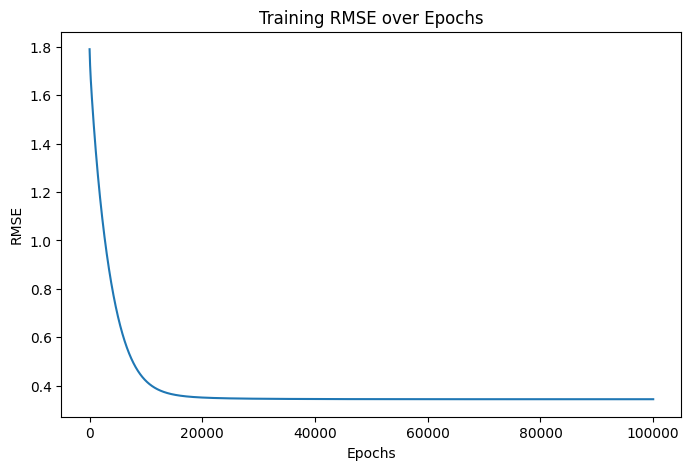

In [22]:
# straight from chatgpt
import matplotlib.pyplot as plt
# 1. RMSE over training epochs
plt.figure(figsize=(8,5))
plt.plot(rmse_list)
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Training RMSE over Epochs")
plt.show()

In [29]:
correct = 0
for i, j in zip(y_predicted, y_test):
  if i > 0.5:
    i = 1
  else:
    i = 0
  if i == j:
    correct += 1
print(f"Acc: {(correct/y_predicted.shape[0])*100:.2f}%")

Acc: 86.53%


In [30]:
# Testing against scikit learn
from sklearn.linear_model import LinearRegression

#2 models to see if data is centered
model1 = LinearRegression(fit_intercept=True)
model2 = LinearRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [32]:
rmse1 = rmse(y_pred1, y_test)
r2_1 = r2_score(y_pred1, y_test)

rmse2 = rmse(y_pred1, y_test)
r2_2 = r2_score(y_pred1, y_test)

print("Centered?:")
print(f"RMSE: {rmse1:.2f}")
print(f"R²: {r2_1:.3f}")

print("With fit on intercept:")
print(f"RMSE: {rmse2:.2f}")
print(f"R²: {r2_2:.3f}")

Centered?:
RMSE: 0.35
R²: 0.416
With fit on intercept:
RMSE: 0.35
R²: 0.416


In [33]:
#from data models are practically the same so we might infer that our model is optimal and data is centered
correct = 0
for i, j in zip(y_pred1, y_test):
  if i > 0.5:
    i = 1
  else:
    i = 0
  if i == j:
    correct += 1
print(f"Acc: {(correct/y_pred1.shape[0])*100:.2f}%")

Acc: 86.53%
